In [1]:
import os
import pickle

import numpy as np
import torch

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader, random_split
from torch.nn.functional import one_hot

from data_loaders.pulja_data_loader import PuljaDataLoader
from models._20220530_00 import UserModel
from models.utils import collate_fn

if torch.cuda.is_available():
    from torch.cuda import FloatTensor, LongTensor
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
else:
    from torch import FloatTensor, LongTensor

In [2]:
ckpt_path = "ckpts"
if not os.path.isdir(ckpt_path):
    os.mkdir(ckpt_path)

batch_size = 256
num_epochs = 100
train_ratio = 0.9

seq_len = 100

dim_v = 20

dataset = PuljaDataLoader(seq_len)

if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

model = UserModel(dataset.num_c, dataset.num_d, dim_v).to(device)

train_size = int(len(dataset) * train_ratio)
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(
    dataset, [train_size, test_size]
)

if os.path.exists(os.path.join(dataset.dataset_dir, "indices.pkl")):
    with open(os.path.join(dataset.dataset_dir, "indices.pkl"), "rb") as f:
        indices = pickle.load(f)
    train_dataset.indices = indices[0]
    test_dataset.indices = indices[1]
else:
    with open(os.path.join(dataset.dataset_dir, "indices.pkl"), "wb") as f:
        pickle.dump((train_dataset.indices, test_dataset.indices), f)


In [3]:
for d in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]:
    print(np.mean(
        (dataset.df[dataset.df["difficulty_cd"] == d]["isCorrect"] == "Y")
    ))

0.7915178629828761
0.7644189259195303
0.7025539179819519
0.6257541291662546
0.5188984881209503
0.4143646408839779
0.1


In [4]:
for d in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]:
    print(np.mean(
        (dataset.df[dataset.df["difficulty_cd"] == d]["isCorrect"] == "Y") & \
        (dataset.df[dataset.df["difficulty_cd"] == d]["duration"] <= dataset.difficulty2duration[d])
    ))

0.6583205787318656
0.6361595579347263
0.5688187403458649
0.47374146968648007
0.3943484521238301
0.35911602209944754
0.1


In [5]:
difficulty2duration = {
    1.0: 1.5,
    2.0: 2.0,
    3.0: 2.5,
    4.0: 2.5,
    5.0: 3.0,
    6.0: 5.0,
    7.0: 7.0,
}
for d in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]:
    print(np.mean(
        (dataset.df[dataset.df["difficulty_cd"] == d]["isCorrect"] == "Y") & \
        (dataset.df[dataset.df["difficulty_cd"] == d]["duration"] <= difficulty2duration[d] * 60)
    ))

0.6583205787318656
0.6361595579347263
0.5688187403458649
0.47374146968648007
0.3943484521238301
0.35911602209944754
0.1


In [6]:
model.load_state_dict(
    torch.load(
        os.path.join(
            os.path.join(
                ckpt_path, "_20220530_00"
            ),
            "model_fin.ckpt"
        ),
        map_location=device
    )
)
model.eval()

UserModel(
  (D): Embedding(7, 1)
  (gru): GRU(40, 20, batch_first=True)
  (linear_1): Sequential(
    (0): Linear(in_features=20, out_features=20, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=20, out_features=1, bias=True)
    (4): Dropout(p=0.5, inplace=False)
  )
  (linear_2): Sequential(
    (0): Linear(in_features=60, out_features=20, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=20, out_features=1, bias=True)
    (4): Dropout(p=0.5, inplace=False)
  )
)

In [7]:
####################################################################

c_seq = np.array([[0] * 7])
d_seq = np.array([[1, 2, 3, 4, 5, 6, 7]]) - 1
r_seq = np.array([[1, 1, 1, 1, 1, 1, 1]])

# c_seq = np.array([[0] * 7])
# d_seq = np.array([[1, 2, 3, 4, 5, 6, 7]]) - 1
# r_seq = np.array([[1, 1, 1, 1, 1, 1, 0]])

# c_seq = np.array([[0] * 7])
# d_seq = np.array([[1, 2, 3, 4, 5, 6, 7]]) - 1
# r_seq = np.array([[1, 1, 1, 1, 1, 0, 0]])

# c_seq = np.array([[0] * 7])
# d_seq = np.array([[1, 2, 3, 4, 5, 6, 7]]) - 1
# r_seq = np.array([[1, 1, 1, 1, 0, 0, 0]])

# c_seq = np.array([[0] * 7])
# d_seq = np.array([[1, 2, 3, 4, 5, 6, 7]]) - 1
# r_seq = np.array([[1, 1, 1, 0, 0, 0, 0]])

# c_seq = np.array([[0] * 7])
# d_seq = np.array([[1, 2, 3, 4, 5, 6, 7]]) - 1
# r_seq = np.array([[1, 1, 0, 0, 0, 0, 0]])

# c_seq = np.array([[0] * 7])
# d_seq = np.array([[1, 2, 3, 4, 5, 6, 7]]) - 1
# r_seq = np.array([[1, 0, 0, 0, 0, 0, 0]])

# c_seq = np.array([[0] * 7])
# d_seq = np.array([[1, 2, 3, 4, 5, 6, 7]]) - 1
# r_seq = np.array([[0, 0, 0, 0, 0, 0, 0]])

####################################################################

# c_seq = np.array([[0] * 10])
# d_seq = np.array([[7] * 10]) - 1
# r_seq = np.array([[1] * 10])

alpha_seq, h_seq, C_seq = model(
    LongTensor(c_seq),
    LongTensor(d_seq),
    FloatTensor(r_seq),
)

sigmoid_alpha_seq = torch.sigmoid(alpha_seq).detach().cpu().numpy()

CQ_seq = torch.sigmoid(C_seq.squeeze() + alpha_seq.unsqueeze(-1)).detach().cpu().numpy()
C_seq = C_seq.squeeze().detach().cpu().numpy()

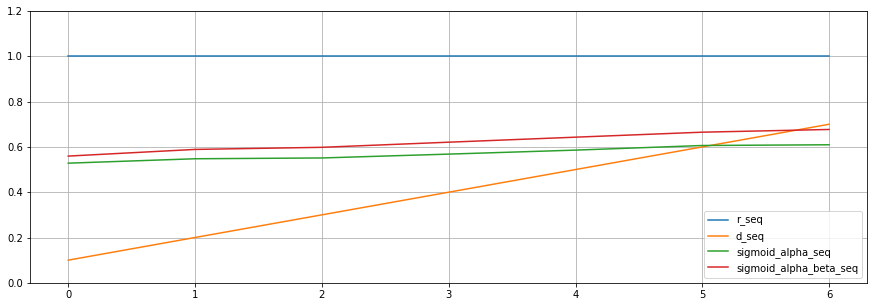

In [8]:
plt.figure(figsize=[15, 5], facecolor="white")
plt.plot(r_seq[0], label="r_seq")
plt.plot((d_seq[0] + 1) / 10, label="d_seq")
plt.plot(sigmoid_alpha_seq, label="sigmoid_alpha_seq")
plt.plot(CQ_seq.T[0], label="sigmoid_alpha_beta_seq")
# plt.plot(sigmoid_alpha_beta_gamma_seq, label="sigmoid_alpha_beta_gamma_seq")
# plt.plot(r_seq_ma, label="r_seq_ma")
plt.grid()
plt.ylim(0, 1.2)
plt.legend()
plt.show()

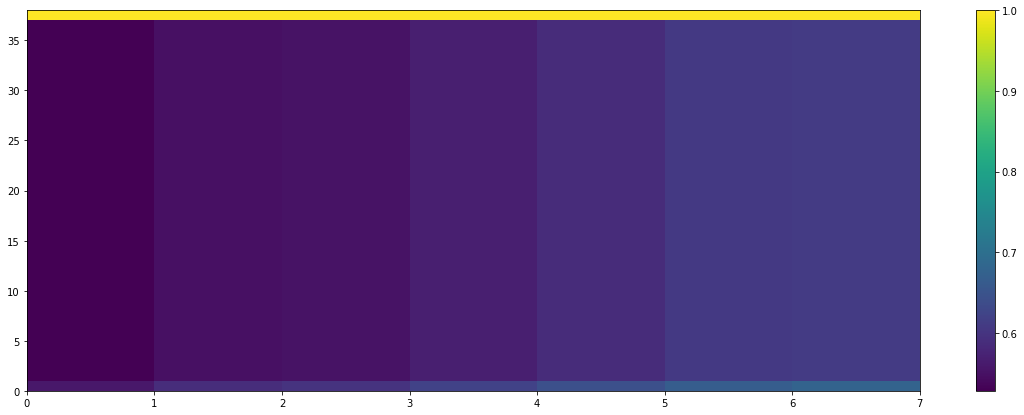

In [9]:
plt.figure(figsize=[20, 7], facecolor="white")
temp = np.concatenate([CQ_seq.T, r_seq], axis=0)
plt.pcolormesh(temp)
plt.colorbar()
plt.show()

# plt.figure(figsize=[15, 0.5], facecolor="white")
# plt.pcolormesh(r_seq)
# plt.show()

In [10]:
CQ_seq[0], CQ_seq[-1], c_seq, d_seq

(array([0.5594529, 0.5281791, 0.5281791, 0.5281791, 0.5281791, 0.5281791,
        0.5281791, 0.5281791, 0.5281791, 0.5281791, 0.5281791, 0.5281791,
        0.5281791, 0.5281791, 0.5281791, 0.5281791, 0.5281791, 0.5281791,
        0.5281791, 0.5281791, 0.5281791, 0.5281791, 0.5281791, 0.5281791,
        0.5281791, 0.5281791, 0.5281791, 0.5281791, 0.5281791, 0.5281791,
        0.5281791, 0.5281791, 0.5281791, 0.5281791, 0.5281791, 0.5281791,
        0.5281791], dtype=float32),
 array([0.6769659 , 0.60940737, 0.60940737, 0.60940737, 0.60940737,
        0.60940737, 0.60940737, 0.60940737, 0.60940737, 0.60940737,
        0.60940737, 0.60940737, 0.60940737, 0.60940737, 0.60940737,
        0.60940737, 0.60940737, 0.60940737, 0.60940737, 0.60940737,
        0.60940737, 0.60940737, 0.60940737, 0.60940737, 0.60940737,
        0.60940737, 0.60940737, 0.60940737, 0.60940737, 0.60940737,
        0.60940737, 0.60940737, 0.60940737, 0.60940737, 0.60940737,
        0.60940737, 0.60940737], dtype=float

In [11]:
from models.utils import collate_fn

train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True,
    collate_fn=collate_fn
)
test_loader = DataLoader(
    test_dataset, batch_size=test_size, shuffle=True,
    collate_fn=collate_fn
)

alphas = []
sigmoid_alphas = []

logits = []
preds = []
tgts = []

for data in train_loader:
    c_seq, d_seq, r_seq, \
        cshft_seq, dshft_seq, rshft_seq, m_seq = data

    batch_size = c_seq.shape[0]
    seq_len = c_seq.shape[1]

    # rshft_seq: [batch_size, seq_len]
    # m_seq: [batch_size, seq_len]

    alpha_seq, h_seq, C_seq = \
        model(c_seq, d_seq, r_seq)

    # alpha_seq: [batch_size, seq_len]

    # cshft_one_hot_seq: [batch_size, seq_len, 1, num_c]
    cshft_one_hot_seq = one_hot(cshft_seq, model.num_c).float()
    cshft_one_hot_seq = torch.reshape(
        cshft_one_hot_seq,
        shape=[
            -1,
            cshft_one_hot_seq.shape[1],
            cshft_one_hot_seq.shape[2]
        ]
    ).unsqueeze(-2)

    # beta_shft_seq: [batch_size, seq_len]
    beta_shft_seq = torch.bmm(
        torch.reshape(
            cshft_one_hot_seq,
            shape=[
                -1,
                cshft_one_hot_seq.shape[2],
                cshft_one_hot_seq.shape[3]
            ]
        ),
        torch.reshape(
            C_seq, shape=[-1, C_seq.shape[2], C_seq.shape[3]]
        )
    )
    beta_shft_seq = torch.reshape(
        beta_shft_seq, shape=[batch_size, seq_len]
    )

    # gamma_shft_seq: [batch_size, seq_len]
    gamma_shft_seq = model.D(dshft_seq).squeeze()
    
    alphas.append(
        torch.masked_select(
            alpha_seq, m_seq
        )
    )
    sigmoid_alphas.append(
        torch.sigmoid(torch.masked_select(
            alpha_seq, m_seq
        ))
    )
    
    logit = torch.masked_select(
        alpha_seq +
        beta_shft_seq -
        gamma_shft_seq, m_seq
    )
    pred = torch.sigmoid(logit)
    
    tgt = torch.masked_select(
        r_seq, m_seq
    )
    
    logits.append(logit)
    preds.append(pred)
    tgts.append(tgt)

alphas = torch.cat(alphas, dim=0).detach().cpu().numpy()
sigmoid_alphas = torch.cat(sigmoid_alphas, dim=0).detach().cpu().numpy()

logits = torch.cat(logits, dim=0).detach().cpu().numpy()
preds = torch.cat(preds, dim=0).detach().cpu().numpy()
tgts = torch.cat(tgts, dim=0).detach().cpu().numpy()

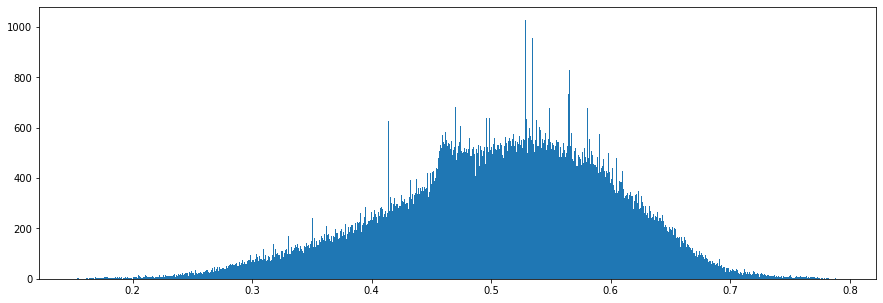

In [12]:
plt.figure(figsize=[15, 5], facecolor="white")
plt.hist(sigmoid_alphas, bins=1000)
plt.show()

In [18]:
num_rep = 3

for c_seq, d_seq, r_seq in [
    (
        np.array([[0] * 7 * num_rep]),
        np.array([[1, 2, 3, 4, 5, 6, 7] * num_rep]) - 1,
        np.array([[1, 1, 1, 1, 1, 1, 1] * num_rep]),
    ),
    (
        np.array([[0] * 7 * num_rep]),
        np.array([[1, 2, 3, 4, 5, 6, 7] * num_rep]) - 1,
        np.array([[1, 1, 1, 1, 1, 1, 0] * num_rep]),
    ),
    (
        np.array([[0] * 7 * num_rep]),
        np.array([[1, 2, 3, 4, 5, 6, 7] * num_rep]) - 1,
        np.array([[1, 1, 1, 1, 1, 0, 0] * num_rep]),
    ),
    (
        np.array([[0] * 7 * num_rep]),
        np.array([[1, 2, 3, 4, 5, 6, 7] * num_rep]) - 1,
        np.array([[1, 1, 1, 1, 0, 0, 0] * num_rep]),
    ),
    (
        np.array([[0] * 7 * num_rep]),
        np.array([[1, 2, 3, 4, 5, 6, 7] * num_rep]) - 1,
        np.array([[1, 1, 1, 0, 0, 0, 0] * num_rep]),
    ),
    (
        np.array([[0] * 7 * num_rep]),
        np.array([[1, 2, 3, 4, 5, 6, 7] * num_rep]) - 1,
        np.array([[1, 1, 0, 0, 0, 0, 0] * num_rep]),
    ),
    (
        np.array([[0] * 7 * num_rep]),
        np.array([[1, 2, 3, 4, 5, 6, 7] * num_rep]) - 1,
        np.array([[1, 0, 0, 0, 0, 0, 0] * num_rep]),
    ),
    (
        np.array([[0] * 7 * num_rep]),
        np.array([[1, 2, 3, 4, 5, 6, 7] * num_rep]) - 1,
        np.array([[0, 0, 0, 0, 0, 0, 0] * num_rep]),
    ),
]:
    alpha_seq, h_seq, C_seq = model(
        LongTensor(c_seq),
        LongTensor(d_seq),
        FloatTensor(r_seq),
    )

    sigmoid_alpha_seq = torch.sigmoid(alpha_seq).detach().cpu().numpy()

    CQ_seq = torch.sigmoid(C_seq.squeeze() + alpha_seq.unsqueeze(-1)).detach().cpu().numpy()
    C_seq = C_seq.squeeze().detach().cpu().numpy()
    
    sigmoid_alpha = CQ_seq[-1][1]
    sigmoid_alpha_beta = CQ_seq[-1][0]
    
    print(
        "{}, {}, {}, {}".format(
            sigmoid_alpha,
            1 - np.mean(sigmoid_alphas >= sigmoid_alpha),
            sigmoid_alpha_beta,
            1 - np.mean(sigmoid_alphas >= sigmoid_alpha_beta)
        )
    )

0.6630071997642517, 0.9695817127129901, 0.7254777550697327, 0.9964832140365631
0.5916022658348083, 0.8144035320763372, 0.5981521010398865, 0.8358004988484438
0.5466192960739136, 0.6404420829311647, 0.5445982217788696, 0.632347741325102
0.510159969329834, 0.48498676427021914, 0.5069848895072937, 0.4720807331734215
0.4594867527484894, 0.28582964612341244, 0.4562174081802368, 0.2729666192027982
0.41697749495506287, 0.16872449613440244, 0.4136946201324463, 0.15940692462801387
0.3347896337509155, 0.04717558127311472, 0.33175110816955566, 0.044604887185711095
0.28904277086257935, 0.016996206076012266, 0.2862342298030853, 0.01582553683546606


In [14]:
model.D.weight

Parameter containing:
tensor([[-0.7554],
        [-0.5619],
        [-0.2448],
        [ 0.2410],
        [ 0.6294],
        [ 0.7922],
        [ 1.7171]], requires_grad=True)

In [15]:
down = 30
print(70)
print(70 * (1 - down * 1.5 * 1 / 100))
print(35 * (1 - down * 1.5 * 2 / 100) + 35 * (1 - down * 0.75 / 100))
print(30 * (1 - down * 1.5 * 3 / 100) + 40 * (1 - down * 0.75 / 100))

70
38.5
30.625
20.499999999999996


In [16]:
up = 30
print(70)
print(70 * (1 + up * 1.5 * 1 / 100))
print(35 * (1 + up * 1.5 * 2 / 100) + 35 * (1 + up * 0.75 / 100))
print(30 * (1 + up * 1.5 * 3 / 100) + 40 * (1 + up * 0.75 / 100))

70
101.5
109.375
119.5
